number of iteration : u(0)
i=1   u=2.396507695106303
i=2   u=2.393607027745087
i=3   u=2.392194033789554
i=4   u=2.3919514317424277
i=5   u=2.3919453110986537
i=6   u=2.3919453015847
i=7   u=2.3919453015755265
i=8   u=2.391945301575517
i=9   u=2.3919453015755185
i=10   u=2.3919453015755177


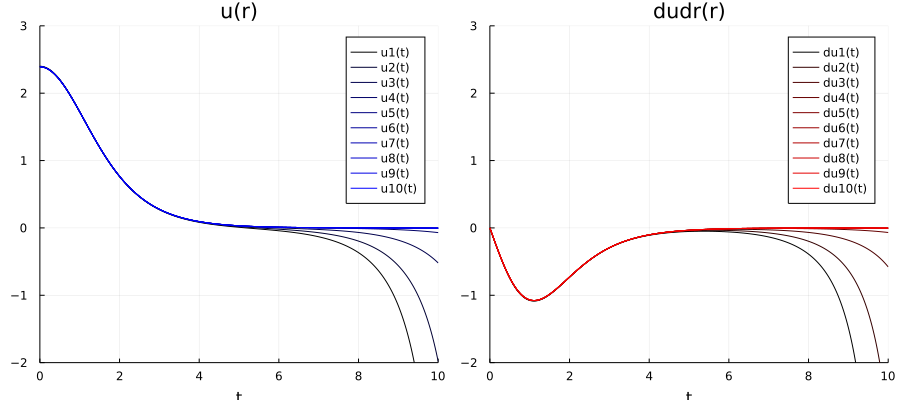

In [122]:
using Plots,DifferentialEquations

function ZKequation(du,u,p,t)
    c = p
    du[1] = u[2]
    du[2] = -u[2]/t + c*u[1] - u[1]*u[1]
end

function initial_load(v)
    V₁ = v
    V₂ = 0.0
    return V₁,V₂
end

function cal_score(u)
    return u
end

function shooting(v)
#start point,end point & interval of r
    r₀ = 10e-4
    R = 10.0
    Rspan = (r₀,R)

#parameters
    c = 1.0
    p = c

#shooting method
    u₁,u₂ = initial_load(v)
    vec_ini = [u₁,u₂]
    prob = ODEProblem(ZKequation,vec_ini,Rspan,p)
    sol = solve(prob,Tsit5(),reltol=1e-8,abstol=1e-8)

    P1,dP1 = sol(R)
    score1 = cal_score(P1) #1st score

    delv=10e-6
    u₁,u₂ = initial_load(v+delv)
    vec_ini = [u₁,u₂]
    prob = ODEProblem(ZKequation,vec_ini,Rspan,p)
    sol = solve(prob,Tsit5(),reltol=1e-8,abstol=1e-8)

    P2,dP2 = sol(R)
    score2 = cal_score(P2) #2nd score

    dfdv = (score2 - score1)/delv
    dv = -score1/dfdv
    v += dv
    return v,dv,sol
end

println("number of iteration : u(0)")

v = 2.4
Sol = []
for i=1:10
    v,dv,sol = shooting(v)
    push!(Sol,sol)
    print("i=$i   ")
    println("u=$v")
    #println("dv=$dv")
end

xlength = 900
ylength = 400

function PlotSolution(i)
    dcolor = 0.1
plot!(Sol[i],
    xlim = (0,10),
    ylim = (-2,3),
    linewidth = 1,
    lc = [RGB(0.0,0.0,dcolor*i) RGB(dcolor*i,0.0,0.0)],
    label = ["u$i(t)" "du$i(t)"],
    layout = (1,2),
    size = (xlength,ylength)
)
end

plot(Sol[1],
    xlim = (0,10),
    ylim = (-2,3),
    linewidth = 1,
    lc = [RGB(0.0,0.0,0.0) RGB(0.0,0.0,0.0)],
    label = ["u1(t)" "du1(t)"],
    layout = (1,2),
    title = ["u(r)" "dudr(r)"],
    size = (xlength,ylength)
)

    PlotSolution(2)
    PlotSolution(3)
    PlotSolution(4)
    PlotSolution(5)
    PlotSolution(6)
    PlotSolution(7)
    PlotSolution(8)
    PlotSolution(9)
    PlotSolution(10)